In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import random
import torch

warnings.filterwarnings(action = 'ignore')
%matplotlib inline

## Seed Setting

In [4]:
# Seed Setting
seed_value = 42
np.random.seed(seed_value)  
random.seed(seed_value)     
torch.manual_seed(seed_value)  

In [5]:
# Load Data
x_df = pd.read_csv('x_df.csv')
x_df = x_df.iloc[:, 1:]

# label data
y_df_binarized = np.load('y_df_binarized.npy')

In [6]:
x_df['dna'] = y_df_binarized # x_df == full_df

# Setting Categorical column
categorical_column = ['dna']

## CTGAN

In [15]:
from ctgan import CTGAN
import torch

# Initialize the CTGAN model
ctgan = CTGAN(verbose=True)

epochs = 100

# Fit the model 
ctgan.fit(x_df, categorical_column, epochs=epochs)

Gen. (-5.89) | Discrim. (-0.81): 100%|███████████████████████████████████████████████| 100/100 [01:39<00:00,  1.01it/s]


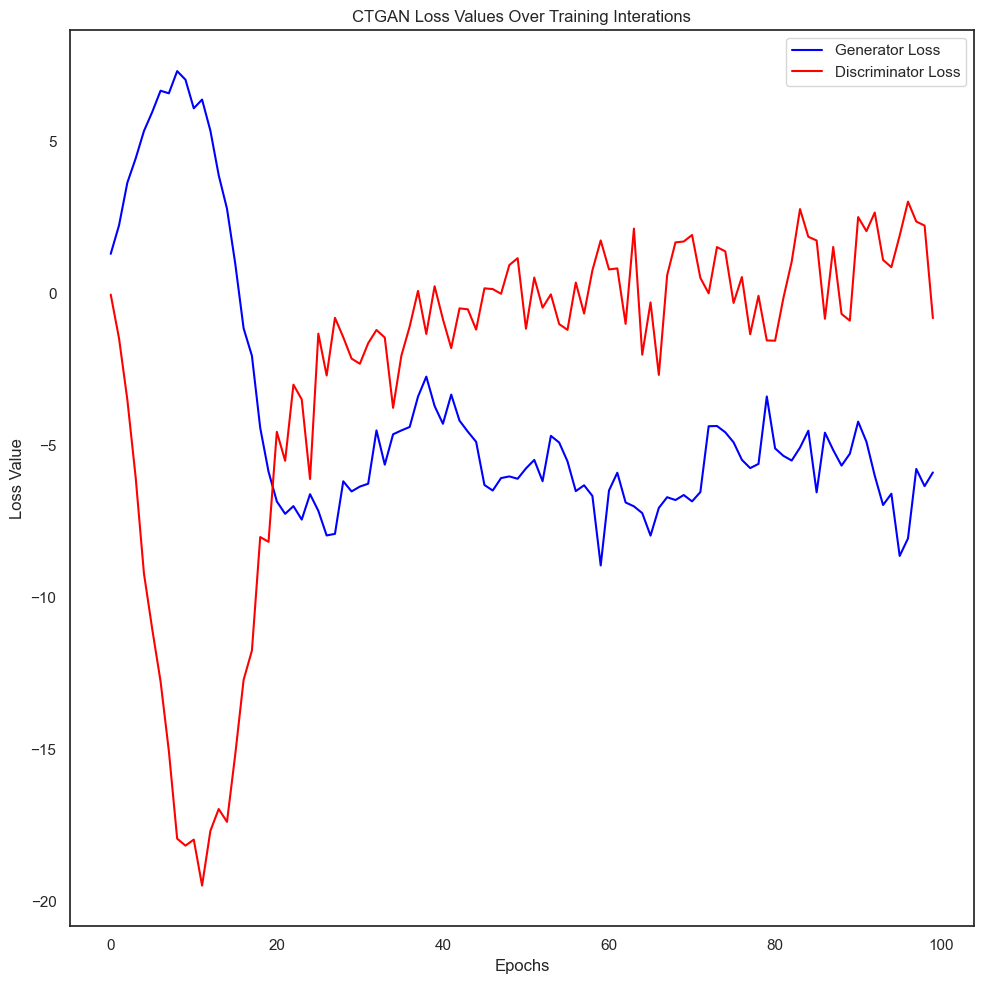

In [16]:
# Model loss Visualization

# Getting Loss Values
G_loss = ctgan.loss_values.iloc[:, 1]
D_loss = ctgan.loss_values.iloc[:, 2]


plt.figure(figsize=(10, 10))

# Generator Loss
plt.plot(G_loss, label='Generator Loss', color='blue')

# Discriminator loss
plt.plot(D_loss, label='Discriminator Loss', color='red')

plt.title('CTGAN Loss Values Over Training Interations')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
# Synthesize Samples
synthetic_data_ctgan = ctgan.sample(1000) # Synthesize 1000 Samples

Real data shape: (357, 737)
Synthetic data shape: (1000, 737)


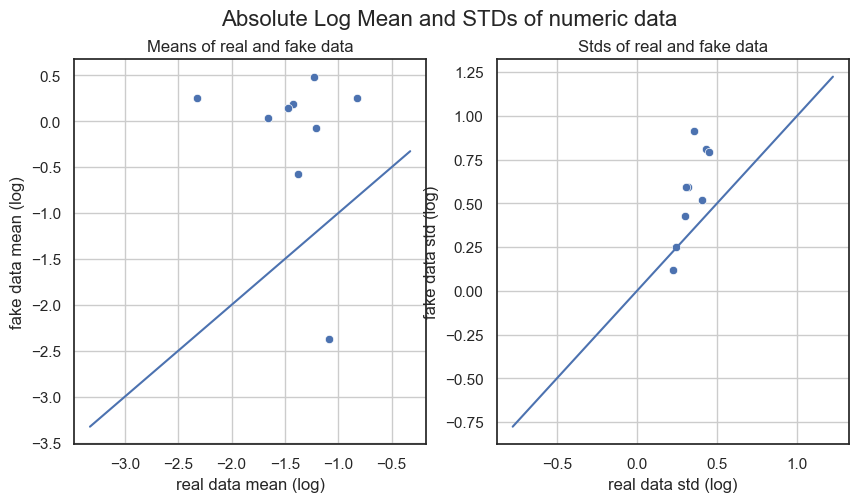

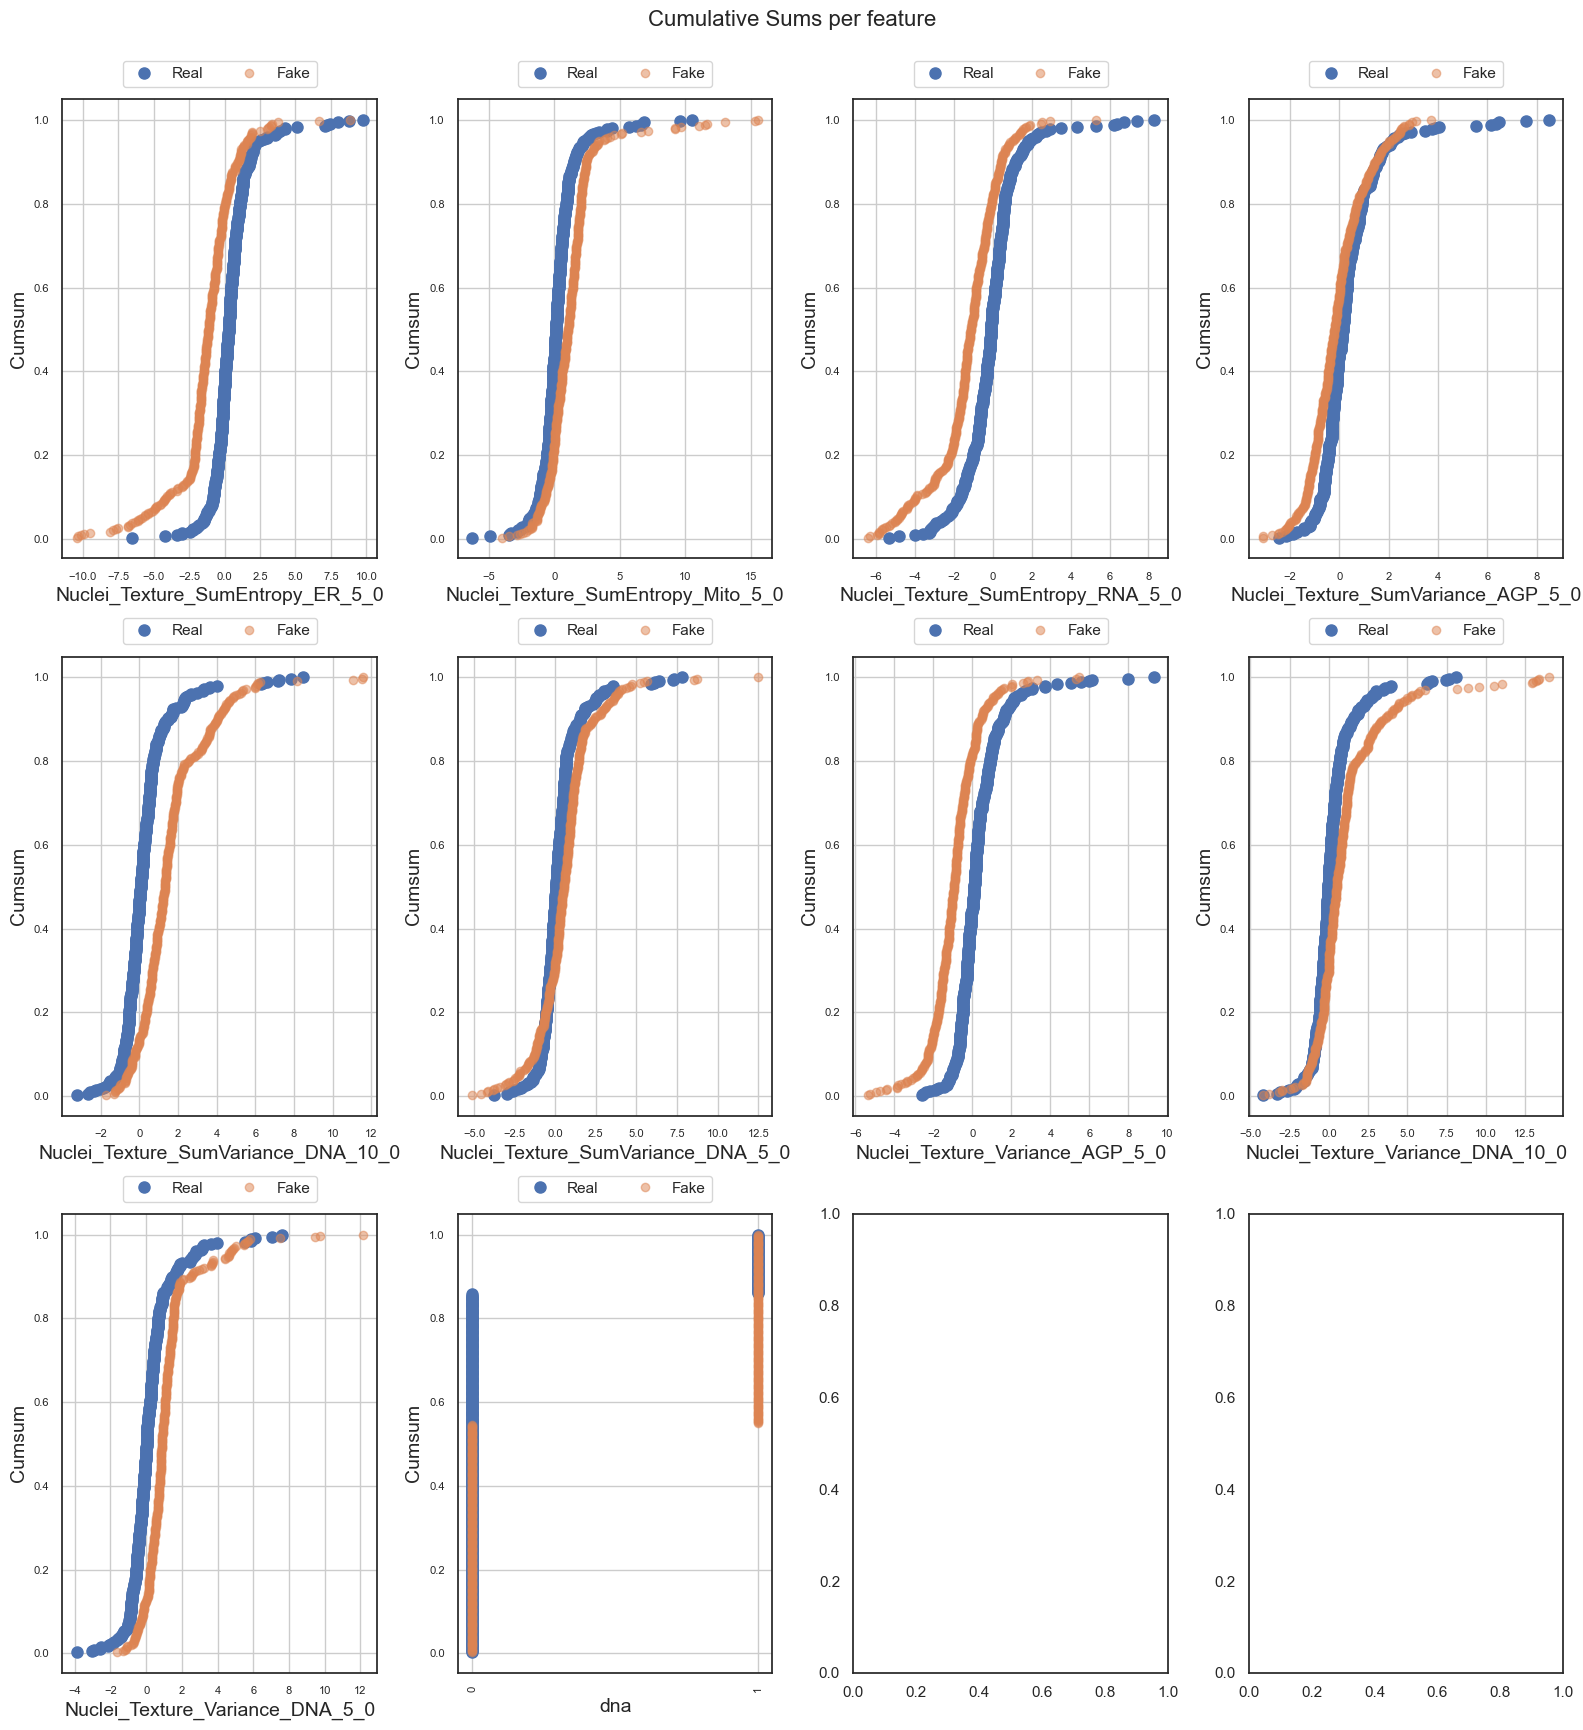

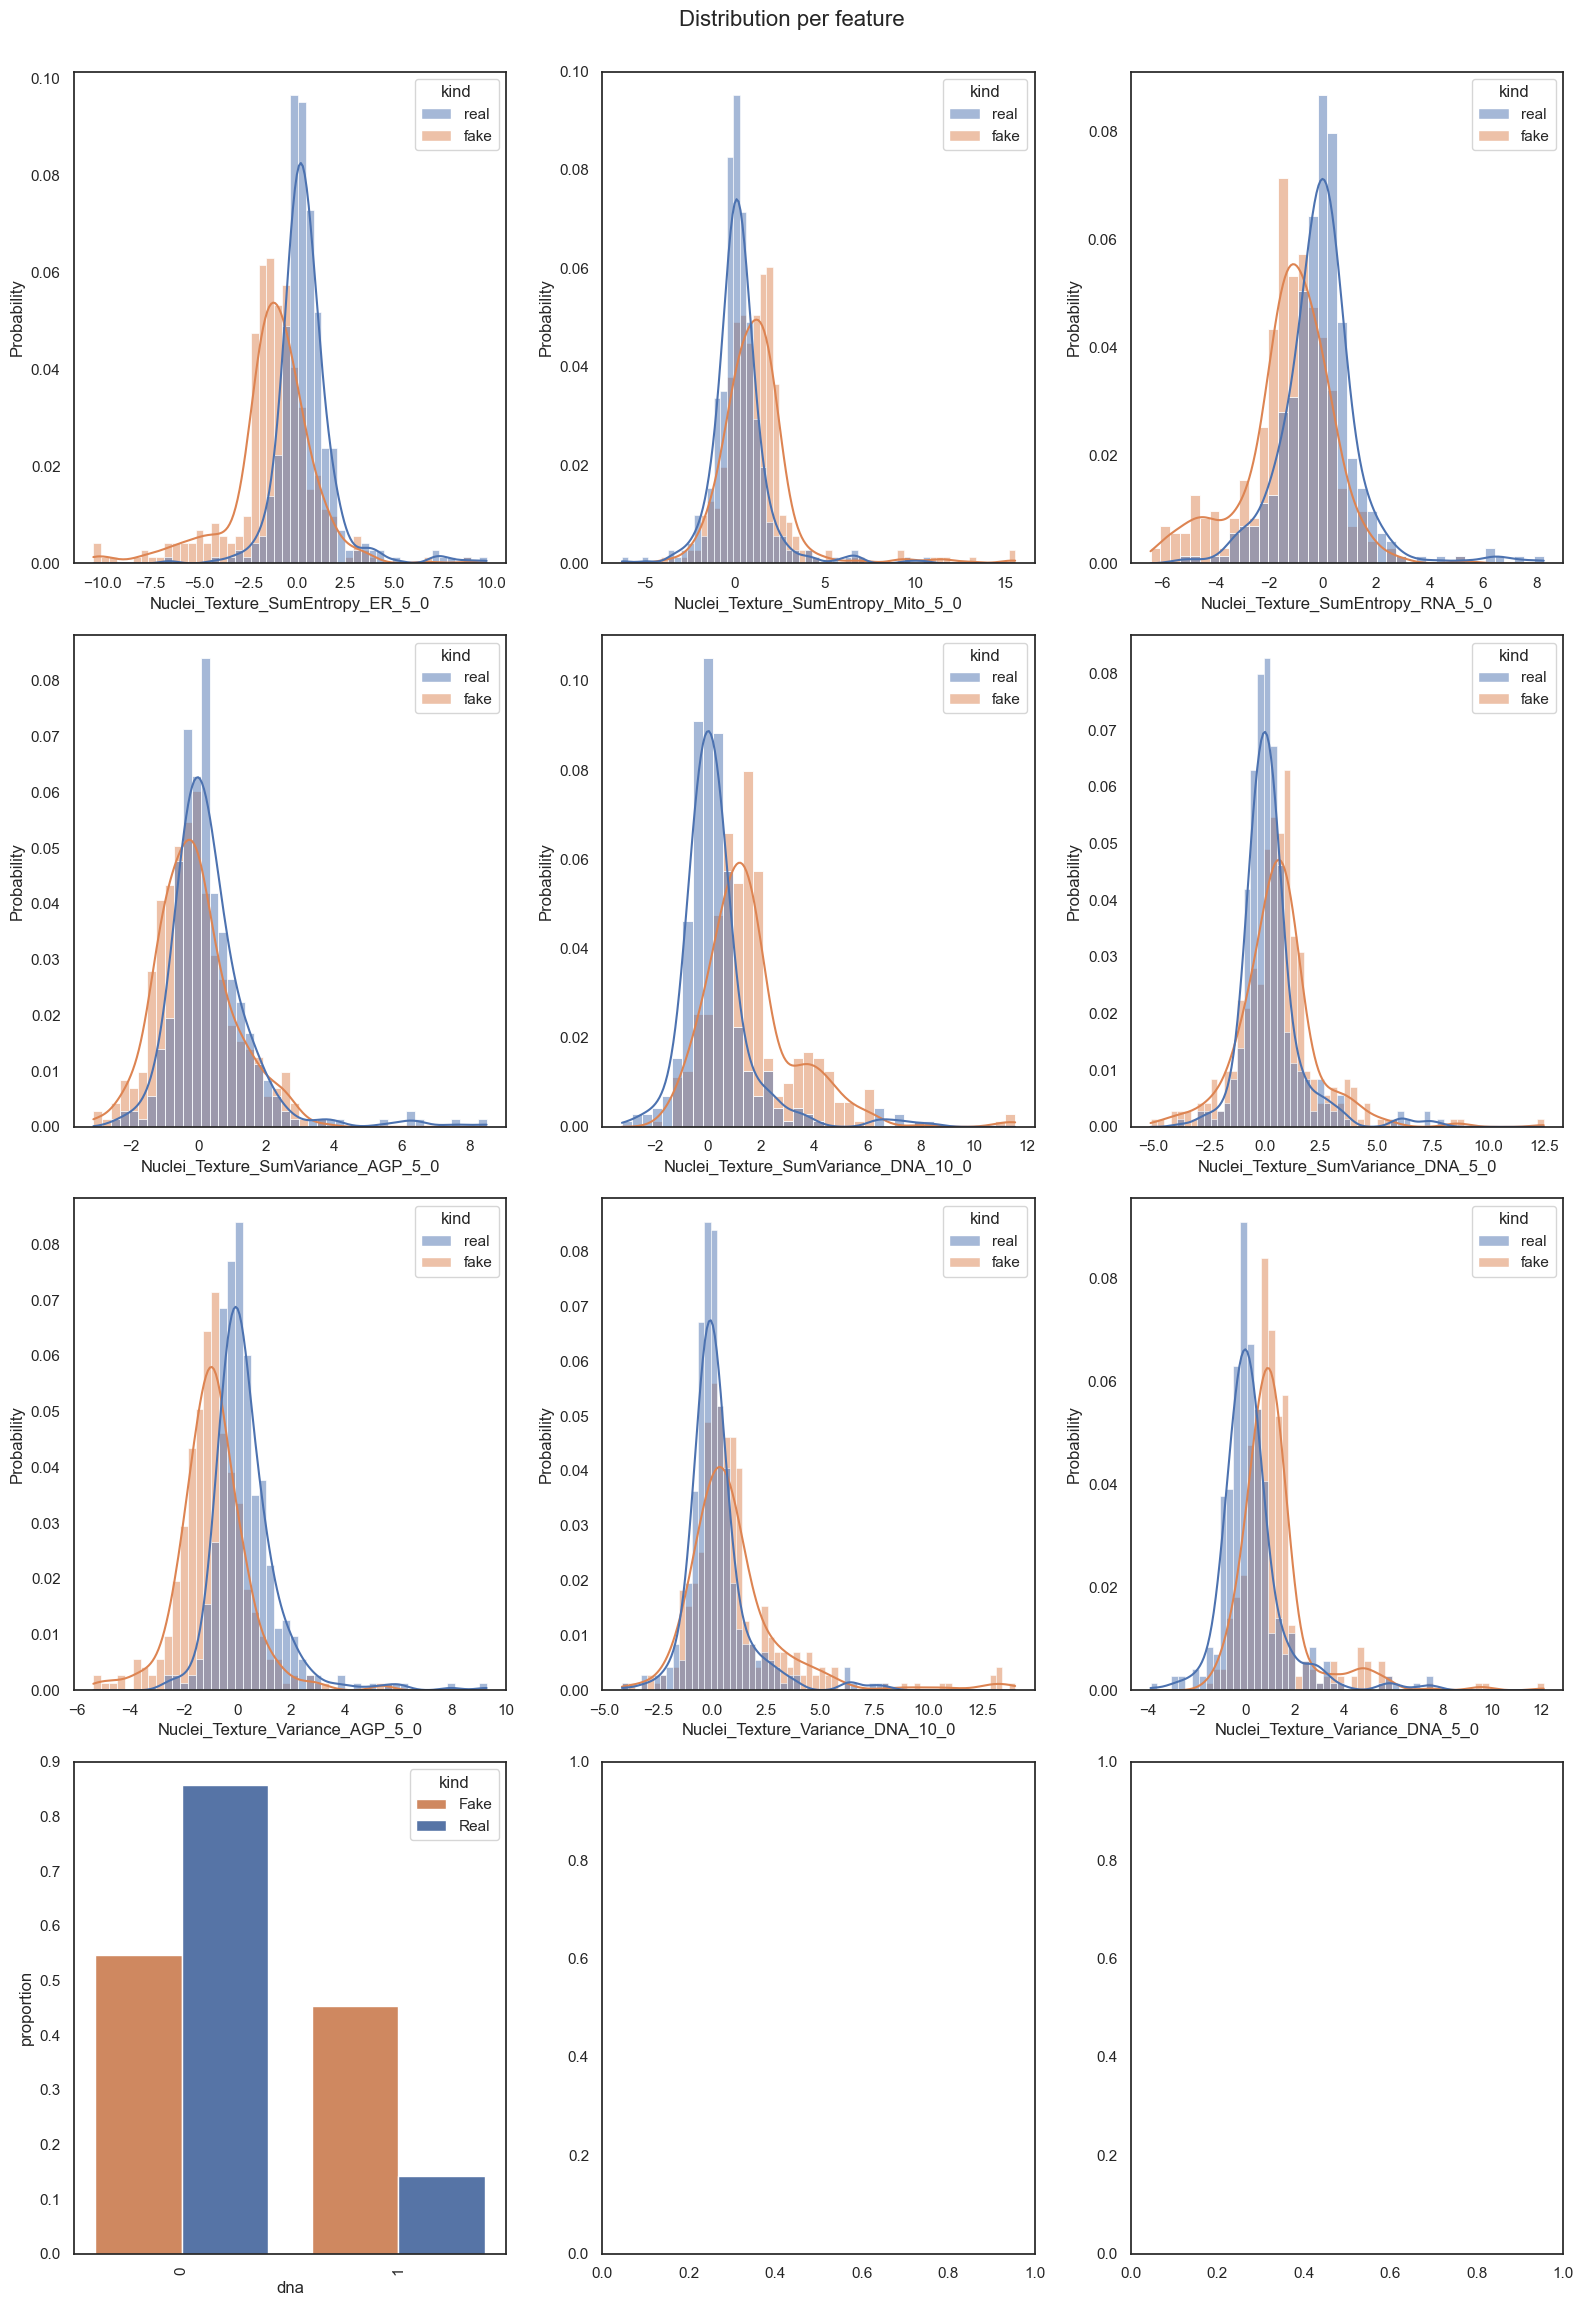

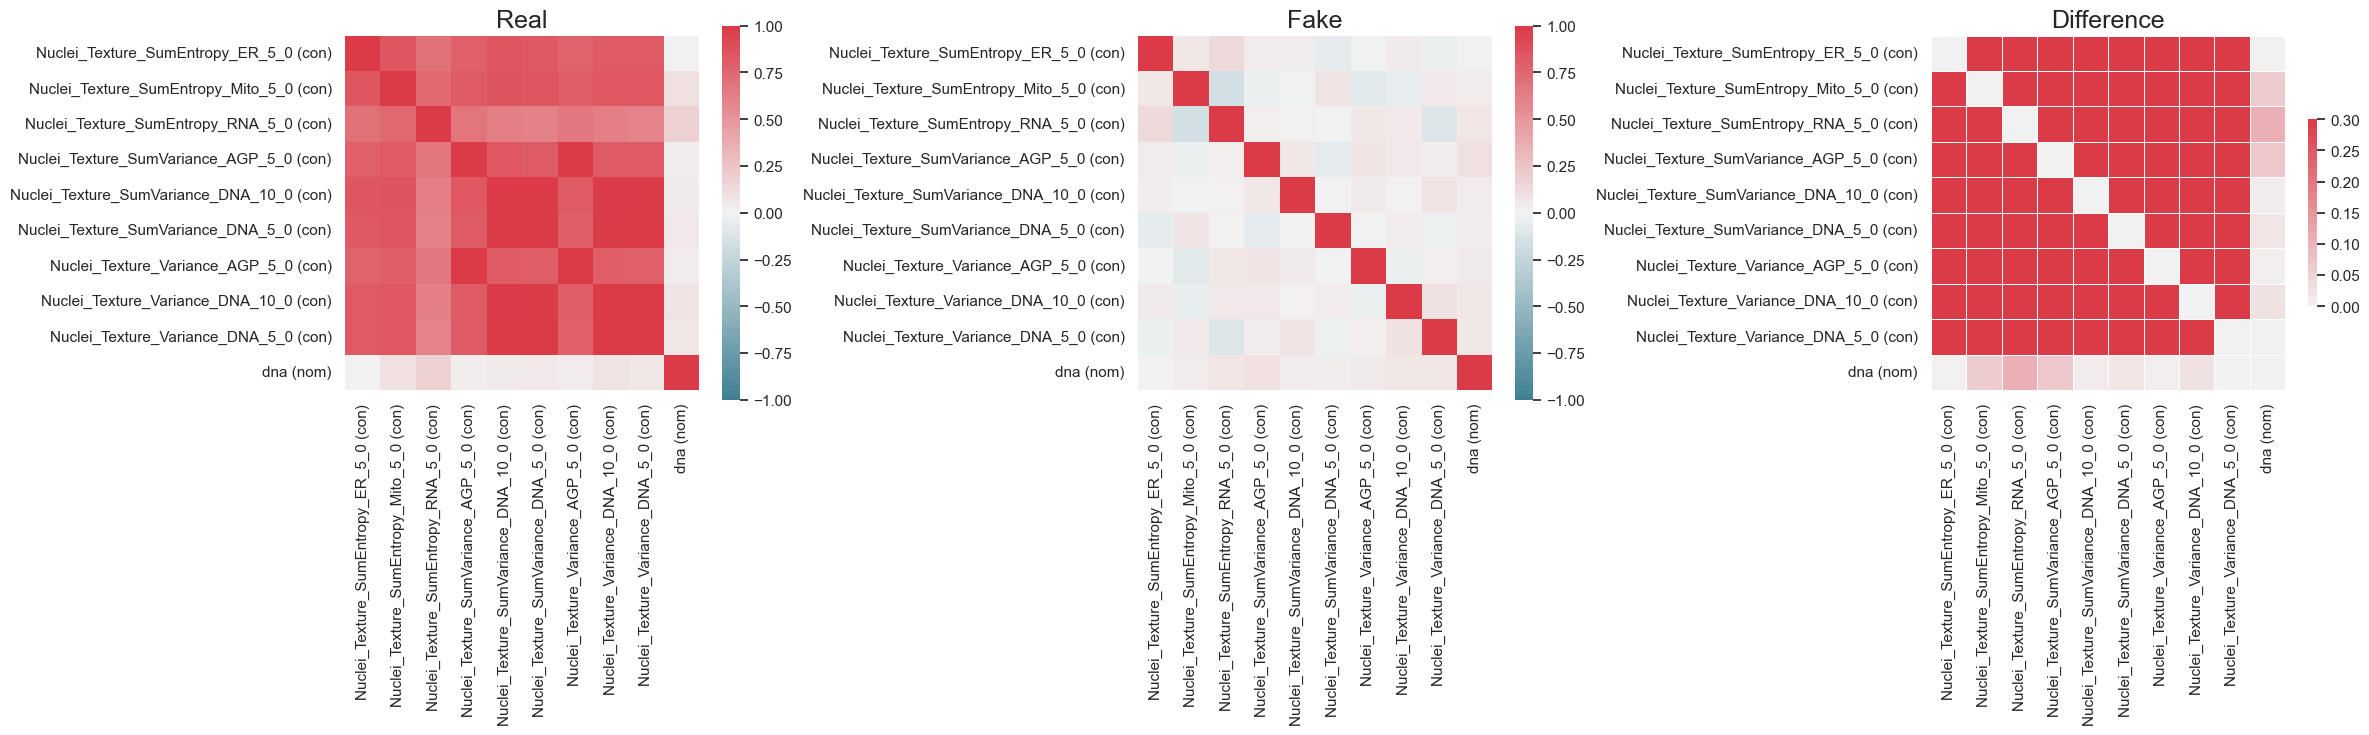

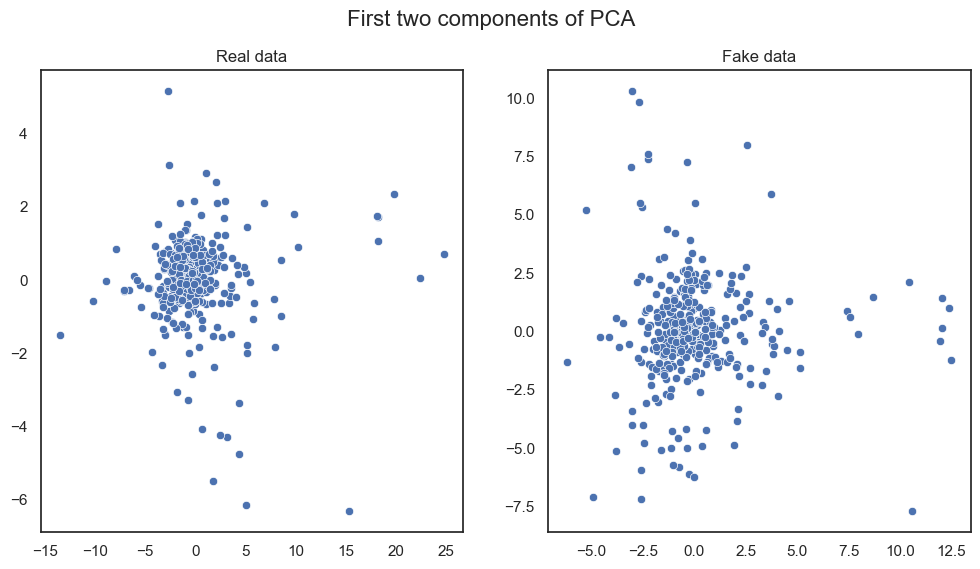

In [18]:
from table_evaluator import TableEvaluator
import matplotlib.pyplot as plt

def data_evaluation(real_data, syn_data, categorical_columns):
    # Select last 10 columns for evaluation
    selected_columns = real_data.columns[-10:]  # Use real_data for columns

    print("Real data shape:", real_data.shape)
    print("Synthetic data shape:", syn_data.shape)

    # Create TableEvaluator object
    table_evaluator = TableEvaluator(real_data[selected_columns], syn_data[selected_columns], cat_cols=categorical_columns)

    # Call visual evaluation method
    table_evaluator.visual_evaluation()  # Add parentheses to call the function

    # Display the plot
    plt.show()

# Call the function with your real and synthetic data
data_evaluation(x_df, synthetic_data_ctgan, categorical_column)

## TVAE

In [19]:
!pip install tvae

ERROR: Could not find a version that satisfies the requirement tvae (from versions: none)
ERROR: No matching distribution found for tvae


In [ ]:
from tvae import TVAE

# Set Continuous columns
x_df_filt = x_df.drop(columns='dna')

con_cols = x_df_filt.columns.tolist()

# TVAE Model Setting
model = TVAE(continuous_columns=con_cols,
            categorical_columns=['dna'],
            epochs=300,
            latnet_dim=10,
            hiddne_dim=64
            )

# Model Fitting
model.fit(x_df)

# Generate Data 
synthetic_data_tvae = model.sample(num_samples=1000)

In [ ]:
# Data Evaluation

data_evaluation(x_df, synthetic_data_tvae, categorical_column)